In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Load Dataset

In [2]:
df = pd.read_csv("app/code/data/Cars.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
# Check the shape
df.shape

(8128, 13)

In [4]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
# Quick analysis of each column
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## 2. EDA

### Inspect "owner"

In [6]:
# Check all unique values in column "owner"
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [7]:
# Map First owner to 1, ..., Test Drive Car to 5 in owner column
df['owner'].replace({
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5}, inplace=True)

df['owner'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [8]:
# Check selling_price via each category of owner
print('-'*40)
print('Means of selling_price by owner')
print('-'*40)
print(df.groupby(['owner'])['selling_price'].mean().round())
print('-'*40)
print('Median of selling_price by owner')
print('-'*40)
print(df.groupby(['owner'])['selling_price'].median().round())

----------------------------------------
Means of selling_price by owner
----------------------------------------
owner
1     783086.0
2     392964.0
3     284015.0
4     225813.0
5    4403800.0
Name: selling_price, dtype: float64
----------------------------------------
Median of selling_price by owner
----------------------------------------
owner
1     550000.0
2     310000.0
3     225000.0
4     170000.0
5    5923000.0
Name: selling_price, dtype: float64


In [9]:
# Drop "Test Drive Cars" because they are too expensive
df =  df[df['owner'] != 5].reset_index(drop=True)
df['owner'].unique()

array([1, 2, 3, 4], dtype=int64)

Text(0.5, 0, 'owner')

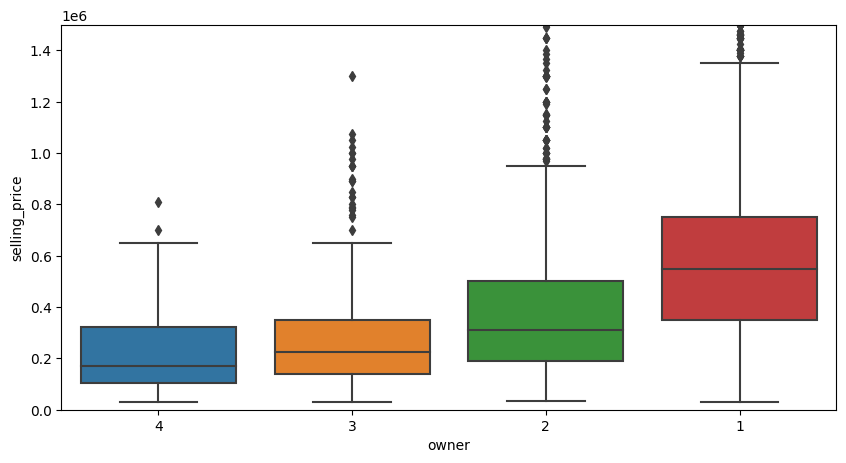

In [10]:
# Box plot of the range of selling prices per each type of owner
plt.figure(figsize=(10, 5))
# Order categories by median values in ascending order
med_idx = df.groupby(['owner'])['selling_price'].median().sort_values().index
sns.boxplot(x = df["owner"], y = df["selling_price"], order=med_idx)

plt.ylim([0, 1500000])
plt.ylabel("selling_price")
plt.xlabel("owner")

Text(0.5, 0, 'owner')

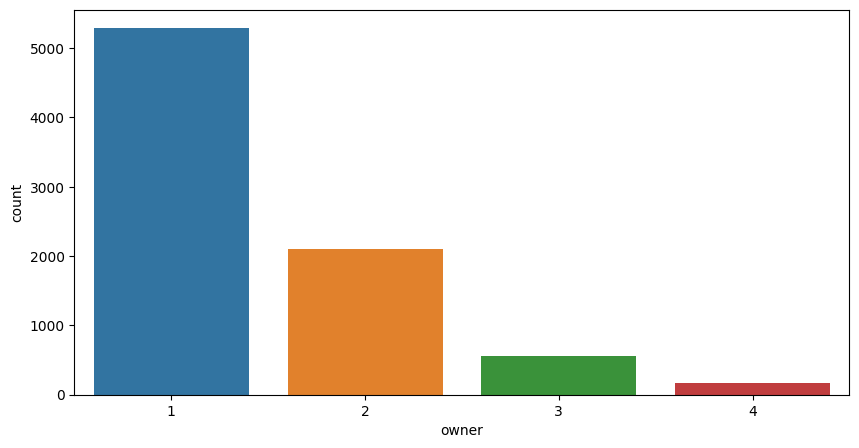

In [11]:
# Count number of each type of owner
plt.figure(figsize=(10, 5))
# Order categories by count
count_idx = df['owner'].value_counts().index
sns.countplot(data=df, x='owner', order=count_idx)

plt.xlabel("owner")

Most of the cars in our dataset are first owner cars.

### Inspect "fuel"

In [12]:
# Check all unique values in column "fuel"
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [13]:
# Remove all rows with CNG and LPG because CNG and LPG in "fuel" column
to_remove = ['LPG', 'CNG']
df =  df[~df['fuel'].isin(to_remove)].reset_index(drop=True)
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [14]:
# Check selling_price via each category of fuel
print('-'*40)
print('Means of selling_price by fuel')
print('-'*40)
print(df.groupby(['fuel'])['selling_price'].mean().round())
print('-'*40)
print('Median of selling_price by fuel')
print('-'*40)
print(df.groupby(['fuel'])['selling_price'].median().round())

----------------------------------------
Means of selling_price by fuel
----------------------------------------
fuel
Diesel    791326.0
Petrol    457252.0
Name: selling_price, dtype: float64
----------------------------------------
Median of selling_price by fuel
----------------------------------------
fuel
Diesel    550000.0
Petrol    340000.0
Name: selling_price, dtype: float64


Text(0.5, 0, 'fuel')

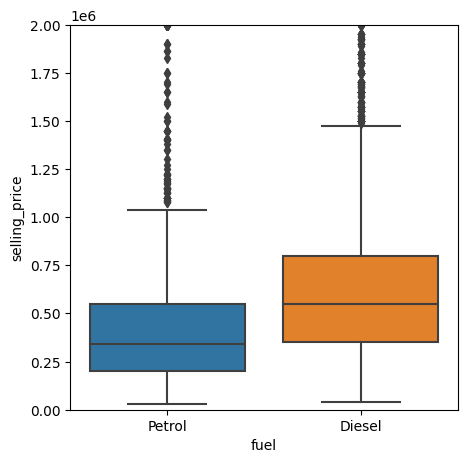

In [15]:
# Box plot of the range of selling prices per each type of fuel
plt.figure(figsize=(5, 5))
# Order categories by median values in ascending order
med_idx = df.groupby(['fuel'])['selling_price'].median().sort_values().index
sns.boxplot(x = df["fuel"], y = df["selling_price"], order=med_idx);

plt.ylim([0, 2000000])
plt.ylabel("selling_price")
plt.xlabel("fuel")

Text(0.5, 0, 'fuel')

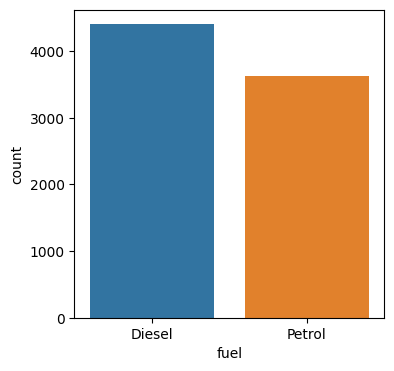

In [16]:
# Count number of each type of fuel
plt.figure(figsize=(4, 4))
# Order categories by count
count_idx = df['fuel'].value_counts().index
sns.countplot(data=df, x='fuel', order=count_idx)

plt.xlabel("fuel")

### Inspect "mileage"

In [17]:
# For mileage, remove "kmpl" and convert the column to float type
df['mileage'] = df['mileage'].str.split().str[0].astype(float)
df['mileage'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

Mean of mileage: 19.391961863322244
Median of mileage: 19.3


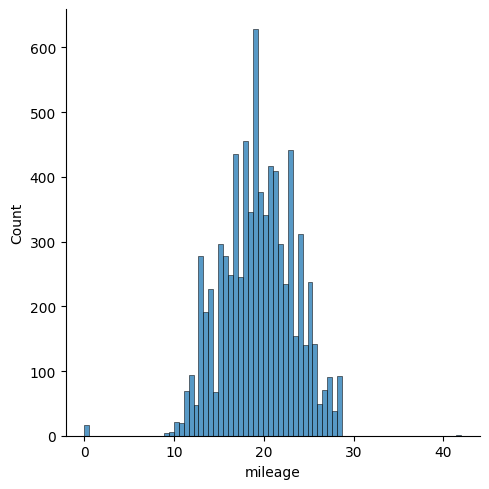

In [18]:
# Distribution plot of mileage
# From the graph, we can see that mileage is normally distributed
sns.displot(data = df, x = 'mileage')

# Mean and Median of mileage
print(f"Mean of mileage: {df['mileage'].mean()}")
print(f"Median of mileage: {df['mileage'].median()}")

### Inspect "km_driven"

Mean of km_driven: 69773.14025909317
Median of km_driven: 60000.0


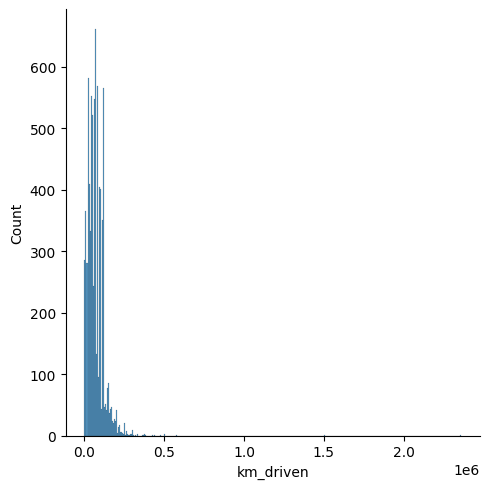

In [19]:
# Distribution plot of km_driven
sns.displot(data = df, x = 'km_driven')

# Mean and Median of mileage
print(f"Mean of km_driven: {df['km_driven'].mean()}")
print(f"Median of km_driven: {df['km_driven'].median()}")

### Inspect "engine"

In [20]:
# For engine, remove "CC" and convert the column to float
df['engine'] = df['engine'].str.split().str[0].astype(float)
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

Mean of max_power: 1462.9146403890454
Median of max_power: 1248.0


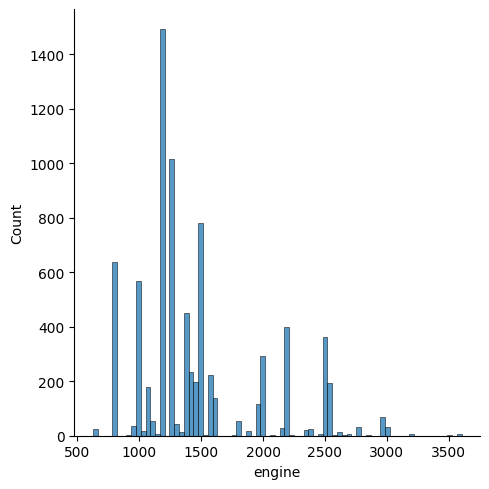

In [21]:
# Distribution plot of engine
sns.displot(data = df, x = 'engine')

# Mean and Median of engine
print(f"Mean of max_power: {df['engine'].mean()}")
print(f"Median of max_power: {df['engine'].median()}")

### Inspect "max_power"

In [22]:
# For max_power, remove "bhp" and convert the column to float
df['max_power'] = df['max_power'].str.split().str[0].astype(float)
df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8023     82.85
8024    110.00
8025     73.90
8026     70.00
8027     70.00
Name: max_power, Length: 8028, dtype: float64

Mean of max_power: 91.8197257033248
Median of max_power: 82.4


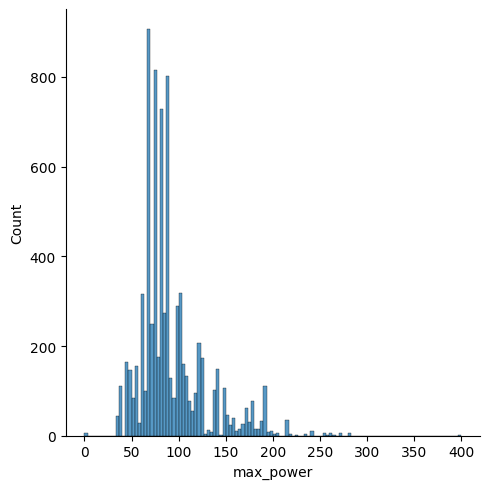

In [23]:
# Distribution plot of max_power
sns.displot(data = df, x = 'max_power')

# Mean and Median of engine
print(f"Mean of max_power: {df['max_power'].mean()}")
print(f"Median of max_power: {df['max_power'].median()}")

### Inspect "seller_type"

In [24]:
# Check selling_price via each category of seller_type
print('-'*40)
print('Means of selling_price by seller_type')
print('-'*40)
print(df.groupby(['seller_type'])['selling_price'].mean().round())
print('-'*40)
print('Median of selling_price by seller_type')
print('-'*40)
print(df.groupby(['seller_type'])['selling_price'].median().round())

----------------------------------------
Means of selling_price by seller_type
----------------------------------------
seller_type
Dealer              1432547.0
Individual           501847.0
Trustmark Dealer     801839.0
Name: selling_price, dtype: float64
----------------------------------------
Median of selling_price by seller_type
----------------------------------------
seller_type
Dealer              690000.0
Individual          400000.0
Trustmark Dealer    650000.0
Name: selling_price, dtype: float64


Text(0.5, 0, 'seller_type')

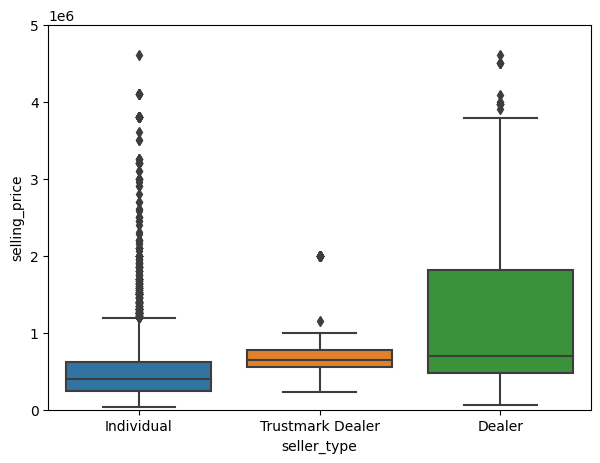

In [25]:
# Box plot of the range of selling prices per each type of fuel
plt.figure(figsize=(7, 5))
# Order categories by median values in ascending order
med_idx = df.groupby(['seller_type'])['selling_price'].median().sort_values().index
sns.boxplot(x = df["seller_type"], y = df["selling_price"], order=med_idx);

plt.ylim([0, 5000000])
plt.ylabel("selling_price")
plt.xlabel("seller_type")

Text(0.5, 0, 'seller_type')

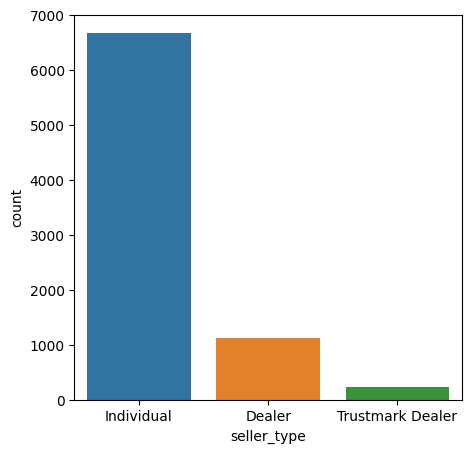

In [26]:
# Count number of each seller type
plt.figure(figsize=(5, 5))
# Order categories by count
count_idx = df['seller_type'].value_counts().index
sns.countplot(data=df, x='seller_type', order=count_idx)

plt.xlabel("seller_type")

Most cars were sold by individual seller.

### Inspect "seats"

In [27]:
# Check selling_price via each category of seats
print('-'*40)
print('Means of selling_price by seats')
print('-'*40)
print(df.groupby(['seats'])['selling_price'].mean().round())
print('-'*40)
print('Median of selling_price by seats')
print('-'*40)
print(df.groupby(['seats'])['selling_price'].median().round())

----------------------------------------
Means of selling_price by seats
----------------------------------------
seats
2.0     700500.0
4.0     491393.0
5.0     631792.0
6.0     581597.0
7.0     813163.0
8.0     585855.0
9.0     500075.0
10.0    344105.0
14.0    235000.0
Name: selling_price, dtype: float64
----------------------------------------
Median of selling_price by seats
----------------------------------------
seats
2.0     700500.0
4.0      65000.0
5.0     425000.0
6.0     500000.0
7.0     690000.0
8.0     500000.0
9.0     500000.0
10.0    295000.0
14.0    235000.0
Name: selling_price, dtype: float64


Text(0.5, 0, 'seats')

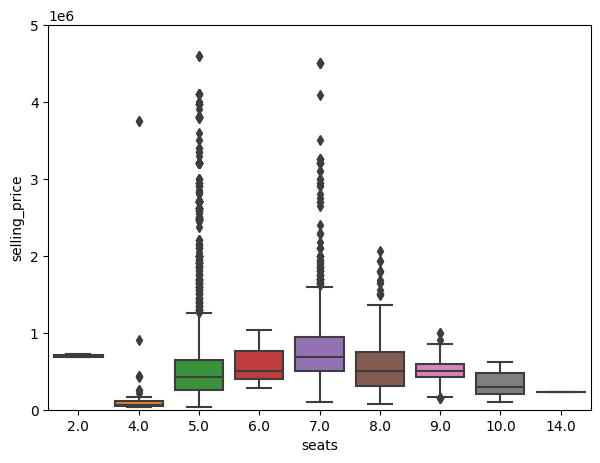

In [28]:
# Box plot of the range of selling prices per each type of seats
plt.figure(figsize=(7, 5))
sns.boxplot(x = df["seats"], y = df["selling_price"]);

plt.ylim([0, 5000000])
plt.ylabel("selling_price")
plt.xlabel("seats")

Text(0.5, 0, 'seats')

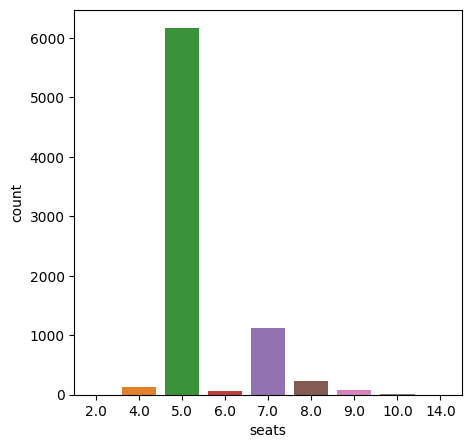

In [29]:
# Count number of each seats
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='seats')

plt.xlabel("seats")

### Inspect "name"

In [30]:
# For the feature brand, take only the first word and remove the rest
df['name'] = df['name'].str.split().str[0]
df.rename(columns={'name': 'brand'}, inplace=True)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [31]:
# Check the mean selling price by car brand
print('-'*40)
print('Means of selling_price by brand')
print('-'*40)
print(df.groupby(['brand'])['selling_price'].mean().round())

----------------------------------------
Means of selling_price by brand
----------------------------------------
brand
Ambassador        124000.0
Ashok             300000.0
Audi             2319432.0
BMW              4109917.0
Chevrolet         274515.0
Daewoo             77000.0
Datsun            314600.0
Fiat              296064.0
Force             887500.0
Ford              516683.0
Honda             593166.0
Hyundai           462422.0
Isuzu            1942000.0
Jaguar           2915465.0
Jeep             2149613.0
Kia              1504500.0
Land             3608333.0
Lexus            5150000.0
MG               1783333.0
Mahindra          623224.0
Maruti            406733.0
Mercedes-Benz    2470444.0
Mitsubishi        817500.0
Nissan            465407.0
Opel               68000.0
Peugeot            57000.0
Renault           462618.0
Skoda             607724.0
Tata              357709.0
Toyota            959947.0
Volkswagen        494216.0
Volvo            3272015.0
Name: selling_pr

In [32]:
# Check the median selling price by car brand
print('-'*40)
print('Median of selling_price by brand')
print('-'*40)
print(df.groupby(['brand'])['selling_price'].median().round())

----------------------------------------
Median of selling_price by brand
----------------------------------------
brand
Ambassador        110500.0
Ashok             300000.0
Audi             2200000.0
BMW              5400000.0
Chevrolet         223000.0
Daewoo             86000.0
Datsun            300000.0
Fiat              280000.0
Force             910000.0
Ford              480000.0
Honda             567500.0
Hyundai           445000.0
Isuzu            1900000.0
Jaguar           3000000.0
Jeep             1675000.0
Kia              1737500.0
Land             4500000.0
Lexus            5150000.0
MG               1750000.0
Mahindra          560000.0
Maruti            370000.0
Mercedes-Benz    2075500.0
Mitsubishi        787500.0
Nissan            375000.0
Opel               68000.0
Peugeot            57000.0
Renault           397000.0
Skoda             645000.0
Tata              280000.0
Toyota            750000.0
Volkswagen        425000.0
Volvo            3400000.0
Name: selling_p

Text(0.5, 0, 'brand')

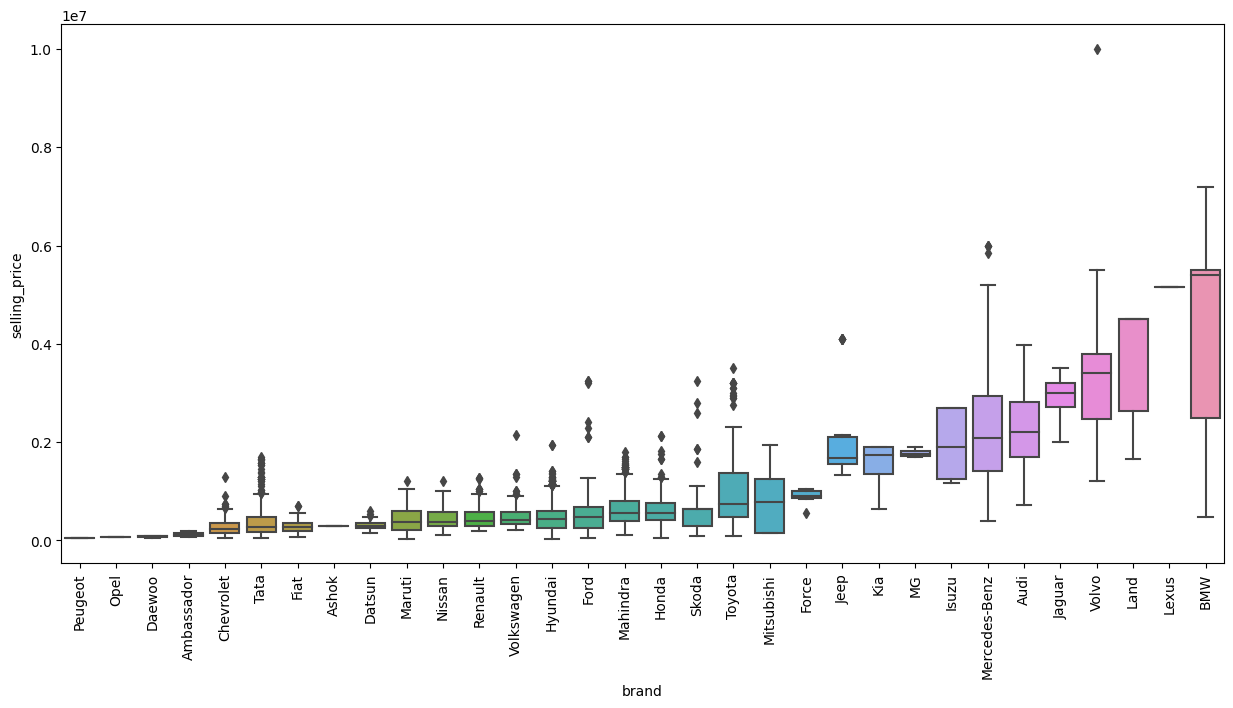

In [33]:
plt.figure(figsize=(15, 7))
# Order the box plot by median values in ascending order
med_idx = df.groupby(['brand'])['selling_price'].median().sort_values().index
sns.boxplot(x = df["brand"], y = df["selling_price"], order=med_idx);

plt.xticks(rotation='vertical')
plt.ylabel("selling_price")
plt.xlabel("brand")

We can see from the boxplot that each car brand has vastly different price range, therefore car brand can be selected as a predictor of selling price

Text(0.5, 0, 'brand')

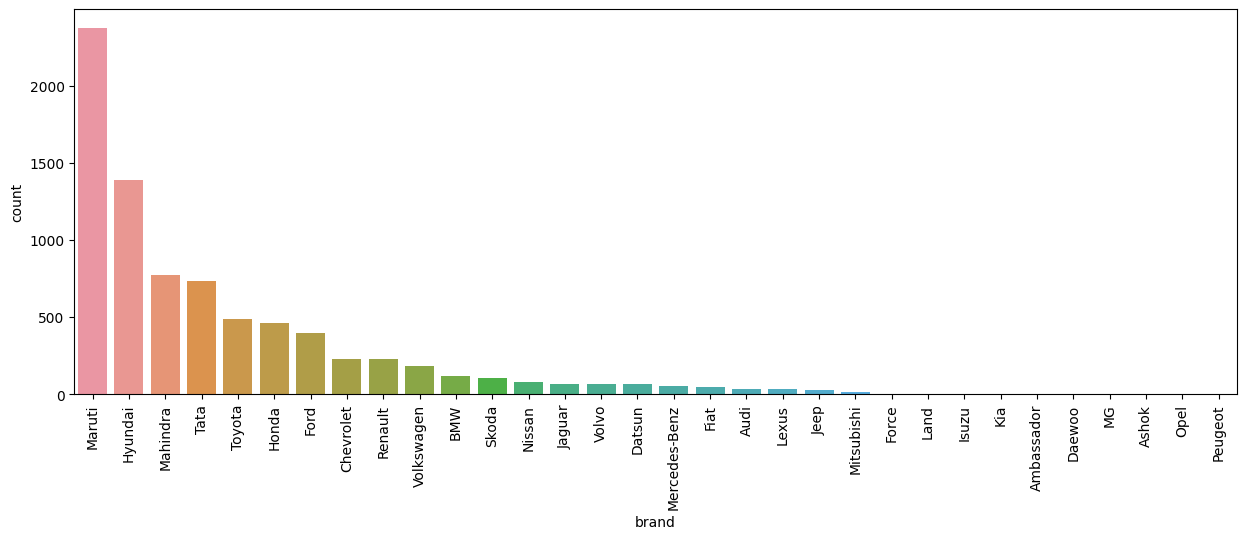

In [34]:
# Count number of each car brand
plt.figure(figsize=(15, 5))
# Order categories by count
count_idx = df['brand'].value_counts().index
sns.countplot(data=df, x='brand', order=count_idx)

plt.xticks(rotation='vertical')
plt.xlabel("brand")

From the above count plot, Maruti brand appears the most in our dataset (mode)

### Inspect "transmission"

In [35]:
# Check selling_price via each category of seller_type
print('-'*40)
print('Means of selling_price by transmission')
print('-'*40)
print(df.groupby(['transmission'])['selling_price'].mean().round())
print('-'*40)
print('Median of selling_price by transmission')
print('-'*40)
print(df.groupby(['transmission'])['selling_price'].median().round())

----------------------------------------
Means of selling_price by transmission
----------------------------------------
transmission
Automatic    1858222.0
Manual        457946.0
Name: selling_price, dtype: float64
----------------------------------------
Median of selling_price by transmission
----------------------------------------
transmission
Automatic    1082500.0
Manual        400000.0
Name: selling_price, dtype: float64


Text(0.5, 0, 'transmission')

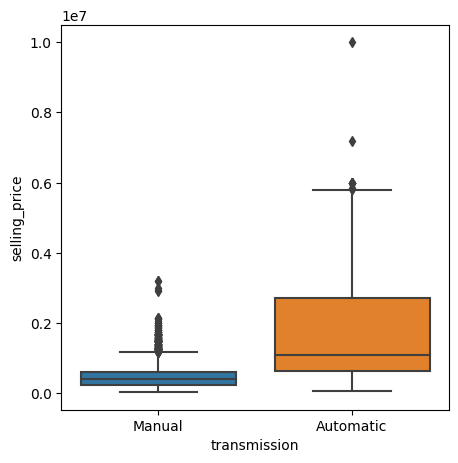

In [36]:
# Box plot of the range of selling prices per each type of transmission
plt.figure(figsize=(5, 5))
# Order the box plot by median values in ascending order
med_idx = df.groupby(['transmission'])['selling_price'].median().sort_values().index
sns.boxplot(x = df["transmission"], y = df["selling_price"], order=med_idx);

# plt.ylim([0, 5000000])
plt.ylabel("selling_price")
plt.xlabel("transmission")

Text(0.5, 0, 'transmission')

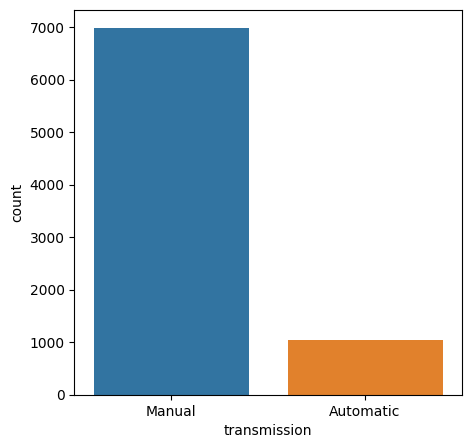

In [37]:
# Count number of each transmission type
plt.figure(figsize=(5, 5))
# Order categories by count
count_idx = df['transmission'].value_counts().index
sns.countplot(data=df, x='transmission', order=count_idx)

plt.xlabel("transmission")

### Inspect "year"

Mean of year: 2013.8155206776282
Median of year: 2015.0
Minimum of year: 1983
Maximum of year: 2020


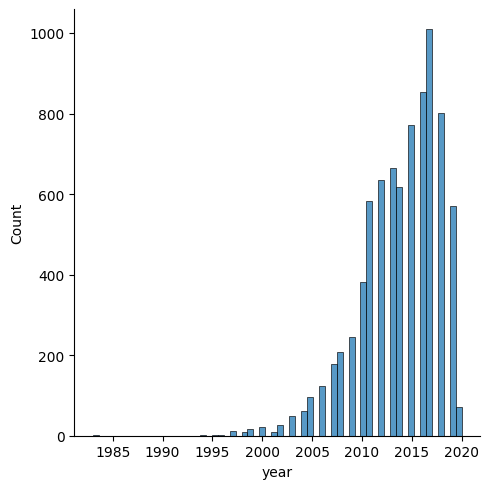

In [38]:
# Distribution plot of max_power
sns.displot(data=df, x='year')

# Mean and Median of year
print(f"Mean of year: {df['year'].mean()}")
print(f"Median of year: {df['year'].median()}")

# Minimum and Maximum of year
print(f"Minimum of year: {df['year'].min()}")
print(f"Maximum of year: {df['year'].max()}")

### Inpect "torque"

In [39]:
# Chaky’s company does not understand well about the feature 'torque'
# Therefore we will drop it
df.drop(columns='torque', inplace=True)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### Convert "selling_price" into discrete variable

In [40]:
df['selling_price'], price_bins = pd.qcut(x=df['selling_price'], q=4, labels=range(0, 4), retbins=True)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,1,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,1,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,0,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,0,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,0,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [41]:
# Count the number of each class in selling_price
df['selling_price'].value_counts()

0    2050
1    2044
3    1991
2    1943
Name: selling_price, dtype: int64

In [44]:
# Maximum of of each bins (classes) ranges
price_bins[1:]

array([  260000.,   450000.,   680000., 10000000.])

### Label and One-Hot Encoding

In [46]:
# Check all unique values of 'brand'
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [47]:
# Check all unique values of 'transmission'
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [48]:
# Check all unique values of 'seller_type'
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [49]:
# Check all unique values of 'brand'
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [50]:
# Since 'fuel' and 'transmission' have only two unique values, we can do label encoding
from sklearn.preprocessing import LabelEncoder

# Label encoding on 'fuel'
fuel_le = LabelEncoder()
df['fuel'] = fuel_le.fit_transform(df['fuel'])

# Label encoding on 'transmission'
trans_le = LabelEncoder()
df['transmission'] = trans_le.fit_transform(df['transmission'])

In [51]:
from sklearn.preprocessing import OneHotEncoder

# Create function for one-hot encoding a feature in dataframe 
def one_hot_transform(encoder, dataframe, feature):

    encoded = encoder.transform(dataframe[[feature]])

    # Transform encoded data arrays into dataframe where columns are based values
    categories = encoder.categories_[0]
    feature_df = pd.DataFrame(encoded.toarray(), columns=categories[1:])
    concat_dataframe = pd.concat([dataframe, feature_df], axis=1)
    
    return concat_dataframe.drop(feature, axis=1)

In [52]:
# Since 'brand' and 'seller_type' have more than two unique values, we should apply one-hot encoding
brand_ohe = OneHotEncoder(drop='first').fit(df[['brand']])
df = one_hot_transform(brand_ohe, df, 'brand')

seller_type_ohe = OneHotEncoder(drop='first').fit(df[['seller_type']])
df = one_hot_transform(seller_type_ohe, df, 'seller_type')

In [53]:
# Excluding one-hot encoded features
selected_cols = ['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
dfcopy = df.copy()
dfcopy = df[selected_cols]

### Correlation and Predictive Power Matrices

- We can use correlation matrix to find out which features are highly correlated with selling price (relavant features)
- It also tells us which features are correlated with each other (redundant features)

<Axes: >

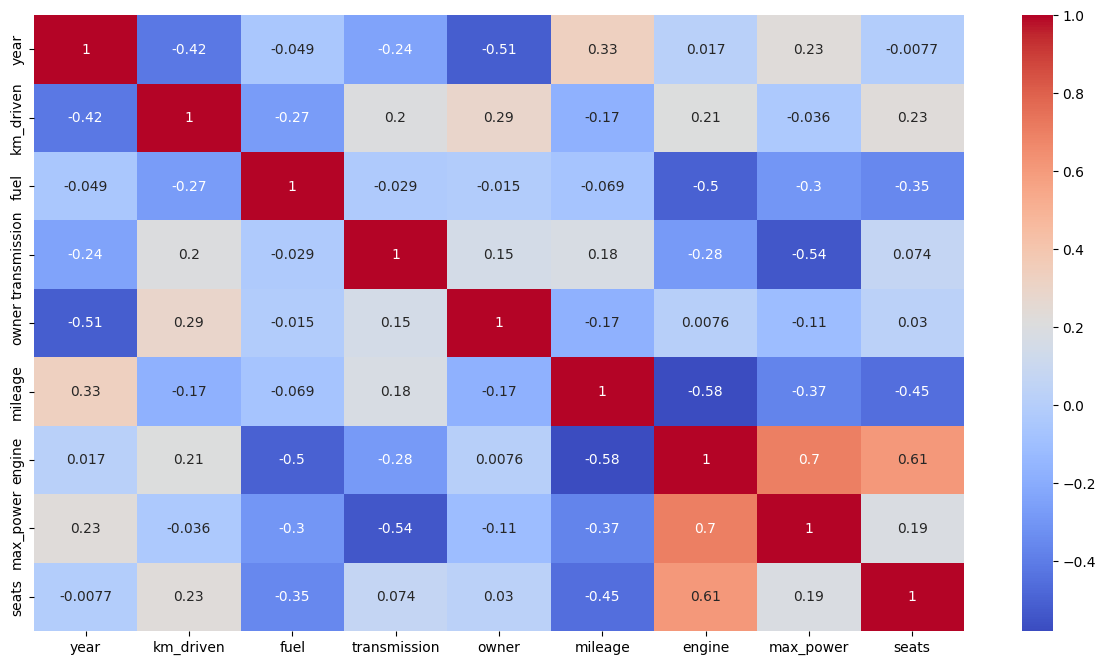

In [54]:
plt.figure(figsize = (15,8))
sns.heatmap(dfcopy.corr(numeric_only=True), annot=True, cmap="coolwarm")

Predictive power tells us how much influence does each feature has to the value of selling price

<Axes: xlabel='x', ylabel='y'>

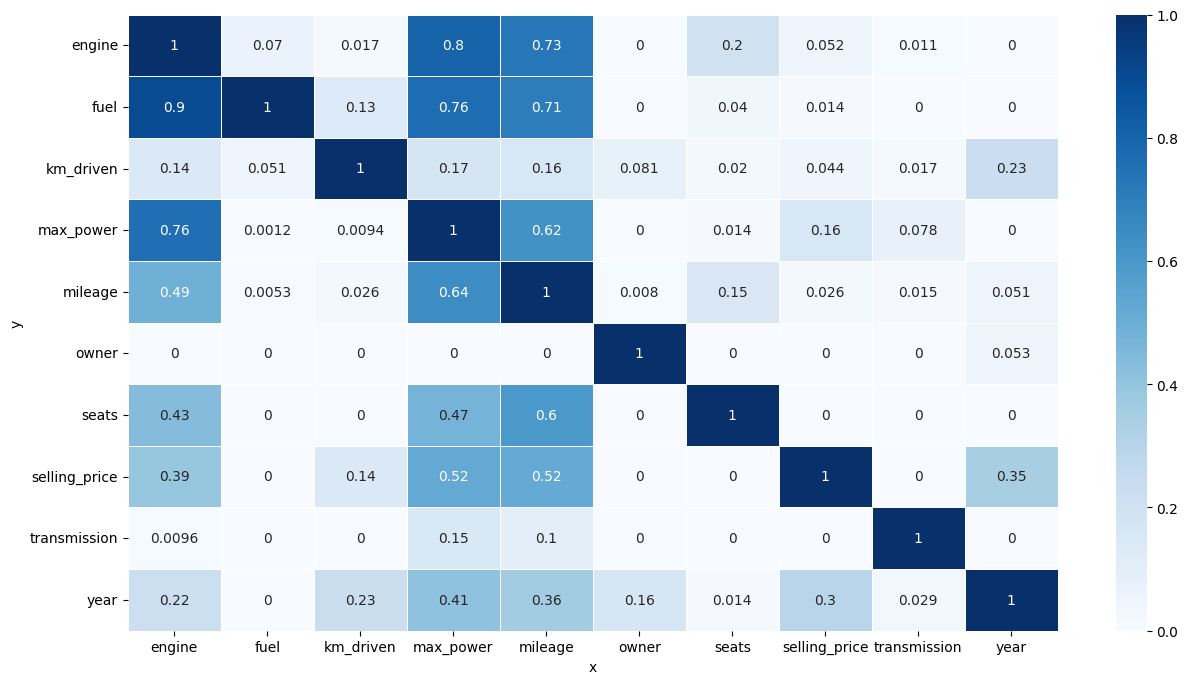

In [55]:
import ppscore as pps

matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3. Data Preprocessing

- From the ppscore matrix, we will select only features with predictive power score > 0.1 in order to predict "selling_price"
- However, we will not select "engine" because it has high correlation with "max_power" and has much lower predictive power.
- In addition, we'll also select columns corresponding to "brand" as features due to the reason mentioned in EDA part

In [56]:
brand_cats = list(brand_ohe.categories_[0][1:])
selected_cols = ['max_power', 'year', 'fuel'] + brand_cats

X = df[selected_cols]
y = df['selling_price']
k = len(set(y))

### Train test split

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Find number of null values for each feature

In [58]:
null_train = X_train.isna().sum()
null_train[null_train > 0]

max_power    165
dtype: int64

In [59]:
null_test = X_test.isna().sum()
null_test[null_test > 0]

max_power    43
dtype: int64

In [60]:
y_train.isna().sum()

0

In [61]:
y_test.isna().sum()

0

### Imputation for max_power

Filling in missing values for max_power using either mean or median

Mean of max_power: 91.8197257033248
Median of max_power: 82.4


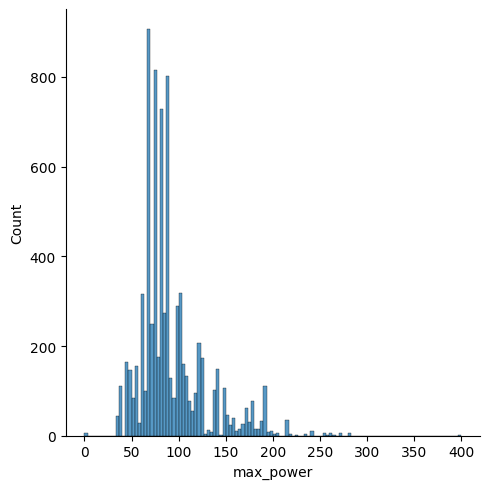

In [62]:
# Let's inspect the distribution plot, mean and median of max_power again
sns.displot(data=df, x='max_power')

print(f"Mean of max_power: {df['max_power'].mean()}")
print(f"Median of max_power: {df['max_power'].median()}")

max_power is skewed so median would be a better choice compared to mean

In [63]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

### Checking outliers

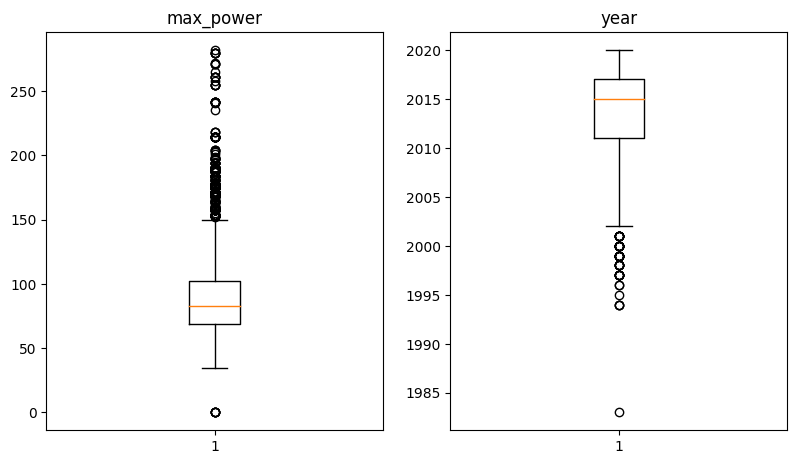

In [64]:
# Create a dictionary of columns.
col_dict = {'max_power': 1,'year': 2}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [65]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [66]:
for col in X_train[['max_power', 'year']]:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%

---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%


### Scaling

As seen in the distribution plots above, all of our numerical features are skewed. Therefore, it is better to do normalization.

In [67]:
from sklearn.preprocessing import MinMaxScaler

# select only features with numerical values not categorical
num_cols = ['max_power', 'year']
scaler = MinMaxScaler(feature_range = (0, 1))
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

### Encode y_train

In [68]:
Y_train_encoded = pd.get_dummies(y_train)

In [69]:
# Convert all to numpy arrays
X_train = X_train.to_numpy()
X_test  = X_test.to_numpy()
Y_train_encoded = Y_train_encoded.to_numpy()
y_test  = y_test.to_numpy()

In [70]:
# Let's check shapes of all X_train, X_test, Y_train_encoded, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", Y_train_encoded.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 34)
Shape of X_test:  (1606, 34)
Shape of y_train:  (6422, 4)
Shape of y_test:  (1606,)


## 4. Modeling

In [71]:
import time
from sklearn.metrics import classification_report
import mlflow

In [68]:
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
mlflow.set_experiment(experiment_name="st124026-a3")

2023/09/20 11:11:57 INFO mlflow.tracking.fluent: Experiment with name 'st124026-a3' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/532683472037472001', creation_time=1695183117454, experiment_id='532683472037472001', last_update_time=1695183117454, lifecycle_stage='active', name='st124026-a3', tags={}>

In [69]:
class LogisticRegression:
    
    def __init__(self, regularization, k, n, method, alpha=0.001, max_iter=5000):
        self.regularization = regularization
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []

        params = {
            "reg": type(self).__name__,
            "method": self.method,
            "k": self.k,
            "n": self.n,
            "alpha": self.alpha,
            "max_iter": self.max_iter
        }
        mlflow.log_params(params=params)
    
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
        
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y

        if self.regularization:
            grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        else:
            grad = self.softmax_grad(X, error)

        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    def accuracy(self, y_test, y_pred):
        return np.count_nonzero(y_test==y_pred) / len(y_test)

    def precision(self, y_test, y_pred, c=0):
        tp = np.nansum(np.logical_and(y_test == c, y_pred == c))
        fp = np.nansum(np.logical_and(y_test != c, y_pred == c))

        if tp + fp == 0:
            return 0
        else:
            return tp / (tp + fp)
    
    def recall(self, y_test, y_pred, c=0):
        tp = np.nansum(np.logical_and(y_test == c, y_pred == c))
        fn = np.nansum(np.logical_and(y_test == c, y_pred != c))
        
        if tp + fn == 0:
            return 0
        else:
            return tp / (tp + fn)
    
    def f1_score(self, y_test, y_pred, c=0):
        precision = self.precision(y_test, y_pred, c)
        recall = self.recall(y_test, y_pred, c)

        if precision + recall == 0:
            return 0
        else:
            return 2 * precision * recall / (precision + recall)
    
    def macro_precision(self, y_test, y_pred):
        precisions = [self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions) / self.k
    
    def macro_recall(self, y_test, y_pred):
        recalls = [self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls) / self.k
    
    def macro_f1(self, y_test, y_pred):
        f1s = [self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s) / self.k
    
    def weighted_precision(self, y_test, y_pred):
        precisions = [np.count_nonzero(y_test == c)  / len(y_test) * self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions)
    
    def weighted_recall(self, y_test, y_pred):
        recalls = [np.count_nonzero(y_test == c)  / len(y_test) * self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls)
    
    def weighted_f1(self, y_test, y_pred):
        f1s = [np.count_nonzero(y_test == c)  / len(y_test) * self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s)
    
    def classification_report(self, y_test, y_pred):
        cols = ["precision", "recall", "f1-score"]
        idx = list(range(self.k))+["accuracy", "macro", "weighted"]

        report = [[self.precision(y_test, y_pred, c),
                self.recall(y_test, y_pred, c),
                self.f1_score(y_test, y_pred, c)] for c in range(self.k)]

        report.append(["", "", self.accuracy(y_test, y_pred)])

        report.append([self.macro_precision(y_test, y_pred),
                    self.macro_recall(y_test, y_pred),
                    self.macro_f1(y_test, y_pred)])

        report.append([self.weighted_precision(y_test, y_pred),
                    self.weighted_recall(y_test, y_pred),
                    self.weighted_f1(y_test, y_pred)])
        
        return pd.DataFrame(report, index=idx, columns=cols)

In [70]:
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class Ridge(LogisticRegression):
    
    def __init__(self, l, k, n, method, alpha=0.001, max_iter=5000):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, k, n, method, alpha, max_iter)

class Normal(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001, max_iter=5000):
        self.regularization = None
        super().__init__(self.regularization, k, n, method, alpha, max_iter)

In [71]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [81]:
test_model = Ridge(0.1, k, X_train.shape[1], "minibatch", max_iter=10000)
test_model.fit(X_train, Y_train_encoded)
yhat = test_model.predict(X_test)
print("=========Sklearn's Classification report=======")
print(classification_report(y_test, yhat))

Loss at iteration 0 1.3541649019096569
Loss at iteration 500 1.0599695889026577
Loss at iteration 1000 1.0210454306801904
Loss at iteration 1500 1.0144443427895198
Loss at iteration 2000 0.9786903647440516
Loss at iteration 2500 0.9767713441933445
Loss at iteration 3000 0.969620906045465
Loss at iteration 3500 0.9745482084375039
Loss at iteration 4000 0.9332697601152018
Loss at iteration 4500 0.9425414621339269
Loss at iteration 5000 0.9072965727005337
Loss at iteration 5500 0.9330123657658443
Loss at iteration 6000 0.9147802642404519
Loss at iteration 6500 0.9276157527683921
Loss at iteration 7000 0.924866599485548
Loss at iteration 7500 0.9038170815765758
Loss at iteration 8000 0.9038559903367395
Loss at iteration 8500 0.9128079765151446
Loss at iteration 9000 0.8999453059580239
Loss at iteration 9500 0.8997307159030724
time taken: 19.87123417854309
=========Sklearn's Classification report=======
              precision    recall  f1-score   support

           0       0.73      0.82

In [82]:
print("=========My Implemented Classification report=======")
print(test_model.classification_report(y_test, yhat))

=========My Implemented Classification report=======
         precision    recall  f1-score
0         0.734783  0.822384  0.776119
1          0.59697  0.432018  0.501272
2         0.476316  0.514205  0.494536
3         0.655963  0.739018  0.695018
accuracy                      0.623910
macro     0.616008  0.626906  0.616736
weighted  0.620009   0.62391  0.616821


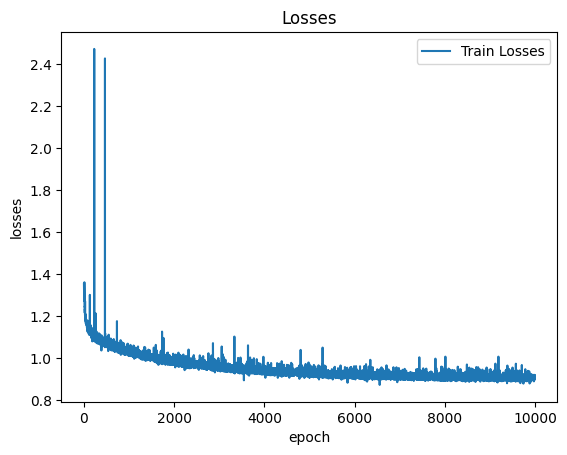

In [83]:
test_model.plot()

In [72]:
# Grid search with regularizations, methods, and alpha values

regs = ["Normal", "Ridge"]
methods = ["batch", "minibatch", "sto"]
alphas = [0.01, 0.001, 0.0001]

for reg in regs:
    for method in methods:
        mlflow.start_run(run_name=f"reg-{reg}-method-{method}", nested=True)

        for alpha in alphas:
            if reg == "Normal":
                params = {"k": k, "n":X_train.shape[1], "method": method, "alpha": alpha, "max_iter": 10000}
            else:
                params = {"k": k, "n":X_train.shape[1], "method": method, "l": 0.1, "alpha": alpha, "max_iter": 10000}
            
            with mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-alpha-{params['alpha']}", nested=True):
                print("="*30)
                print(reg, method)
                print(f"alpha: {alpha}")
                print("="*30)
                type_of_regression = str_to_class(reg)    #Normal, Ridge
                model = type_of_regression(**params)  
                model.fit(X_train, Y_train_encoded)
                yhat = model.predict(X_test)

                accuracy = model.accuracy(y_test, yhat)
                mlflow.log_metric(key="accuracy", value=accuracy)

                for c in range(k):
                    f1 = model.f1_score(y_test, yhat, c)
                    mlflow.log_metric(key=f"class_{c}_f1", value=f1)

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                print("=========Sklearn Classification report=======")
                print(classification_report(y_test, yhat))
                print("\n")

        mlflow.end_run()

mlflow.end_run()

Normal batch
alpha: 0.01
Loss at iteration 0 1.3710972897139146
Loss at iteration 500 6.2657791857767196
Loss at iteration 1000 7.173649768352782
Loss at iteration 1500 11.439305102876247
Loss at iteration 2000 7.633938257355167
Loss at iteration 2500 9.64720501307863
Loss at iteration 3000 7.005097799025214
Loss at iteration 3500 9.927124765990445
Loss at iteration 4000 3.7415321600298608
Loss at iteration 4500 3.925255321662986
Loss at iteration 5000 11.703343857482864
Loss at iteration 5500 8.236789214519431
Loss at iteration 6000 6.4814043836006405
Loss at iteration 6500 5.837000916976266
Loss at iteration 7000 6.3948129883369065
Loss at iteration 7500 4.404389063399644
Loss at iteration 8000 6.441437108311432
Loss at iteration 8500 7.16716721852267
Loss at iteration 9000 4.187796711380554
Loss at iteration 9500 3.515376834825595
time taken: 39.99203133583069
=========Sklearn Classification report=======
              precision    recall  f1-score   support

           0       0.94

## 5. Inference

In [73]:
import pickle

# paths of all components for car price predictions
scaler_path = 'app/code/preprocess/scaler.prep'
fuel_enc_path = 'app/code/preprocess/fuel_encoder.prep'
brand_enc_path = 'app/code/preprocess/brand_encoder.prep'

# load all components
scaler = pickle.load(open(scaler_path, 'rb'))
fuel_le = pickle.load(open(fuel_enc_path, 'rb'))
brand_ohe = pickle.load(open(brand_enc_path, 'rb'))

In [ ]:
# Load registered model from mlflow server
model_name = "st124026-a3-model"
model_version = 1

model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")

In [76]:
sample_df = pd.DataFrame([[107, 2017, 'Petrol', 'BMW']],
                         columns=['max_power', 'year', 'fuel', 'brand'])
sample_df

,max_power,year,fuel,brand
0,107,2017,Petrol,BMW


In [77]:
sample_df[num_cols] = scaler.transform(sample_df[num_cols])
sample_df['fuel'] = fuel_le.transform(sample_df[['fuel']])
sample_df = one_hot_transform(brand_ohe, sample_df, 'brand')
sample_df

,max_power,year,fuel,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0.379433,0.918919,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
output = model.predict(sample_df.to_numpy())
output

array([3], dtype=int64)